# Roller coaster rankings
### The goal of the project is to create several data visualizations that will give some insights into the world of roller coasters

Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv', respectively. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

#load rankings data
wooden_coasters = pd.read_csv('https://raw.githubusercontent.com/IrenaPlotka/codecademy_projects/master/roller_coasters/Golden_Ticket_Award_Winners_Wood.csv')
steel_coasters = pd.read_csv('https://raw.githubusercontent.com/IrenaPlotka/codecademy_projects/master/roller_coasters/Golden_Ticket_Award_Winners_Steel.csv')
print(steel_coasters.head())
# print(wooden_coasters.head())

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo’s Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   

  Supplier  Year Built  Points  Year of Rank  
0  Intamin        2000    1204          2013  
1  Intamin        2000    1011          2013  
2  Intamin        2001     598          2013  
3      B&M        2001     596          2013  
4      B&M        1999     542          2013  


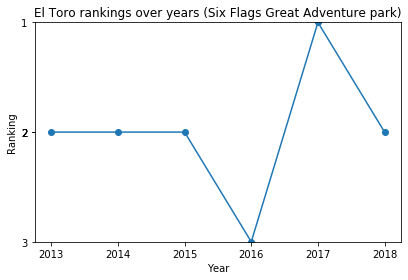

<Figure size 432x288 with 0 Axes>

In [14]:
# function to plot rankings over time for 1 roller coaster
def one_coaster(df, coaster_name, am_park):
  coaster_table = df[(df['Name'] == coaster_name)&(df['Park'] == am_park)]
  fig, ax = plt.subplots()
  ax.plot(coaster_table['Year of Rank'], coaster_table['Rank'], marker = 'o')
  ax.invert_yaxis()
  ax.set_xticks(coaster_table['Year of Rank'].values)
  ax.set_yticks(coaster_table['Rank'].values)
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.title('{} rankings over years ({} park)'.format(coaster_name, am_park))
  # plt.savefig()
  plt.tight_layout()
  plt.show()
  
one_coaster(wooden_coasters, 'El Toro', 'Six Flags Great Adventure')

plt.clf()

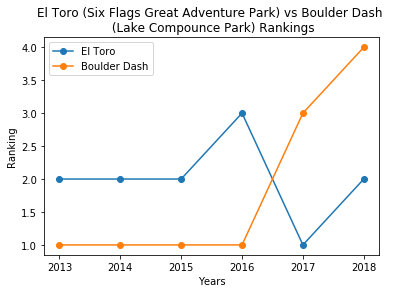

<Figure size 432x288 with 0 Axes>

In [18]:
# function to plot rankings over time for 2 roller coasters
def two_coasters(df, name_one, am_park_one, name_two, am_park_two):
  coaster_one = df[(df['Name'] == name_one) & (df['Park'] == am_park_one)]
  coaster_two = df[(df['Name'] == name_two) & (df['Park'] == am_park_two)]
  fig, ax = plt.subplots()
  ax.plot(coaster_one['Year of Rank'], coaster_one['Rank'], label = name_one, marker = 'o')
  ax.plot(coaster_two['Year of Rank'], coaster_two['Rank'], label = name_two, marker = 'o')
  plt.legend()
  plt.title('{} ({} Park) vs {} \n ({} Park) Rankings'.format(name_one, am_park_one, name_two, am_park_two))
  plt.xlabel('Years')
  plt.ylabel('Ranking')
  plt.legend()
  # plt.savefig()
  plt.show()
  
two_coasters(wooden_coasters, 'El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce')

plt.clf()

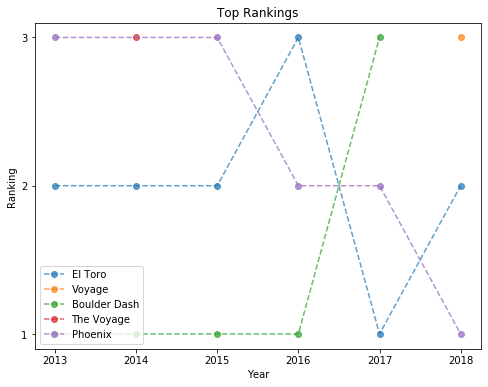

<Figure size 432x288 with 0 Axes>

In [34]:
# function to plot top n rankings over time
def n_coasters(n, df):
  top_n_ranked = df[df['Rank'] <= n]
  fig, ax = plt.subplots(figsize=(8,6))
  for coaster in set(top_n_ranked['Name']):
    coaster_ranked = top_n_ranked[top_n_ranked['Name'] == coaster]
    ax.plot(coaster_ranked['Year of Rank'], coaster_ranked['Rank'], label = coaster, linestyle = '--', marker = 'o', alpha = 0.7)
  ax.set_yticks([i for i in range(1,n+1)])
  plt.legend(loc=3)
  plt.title('Top Rankings')
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.show()

n_coasters(3, wooden_coasters)

plt.clf()

In [36]:
# loading data on all roller coasters
roller_coasters = pd.read_csv('https://raw.githubusercontent.com/IrenaPlotka/codecademy_projects/master/roller_coasters/roller_coasters.csv')
print(roller_coasters.head(10))

                     name material_type seating_type  speed  height  length  \
0                Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1           Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2              Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3                Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4                  Azteka         Steel     Sit Down   55.0    17.0   500.0   
5             Bat Coaster         Steel     Inverted   70.0    20.0   400.0   
6  Batman : Arkham Asylum         Steel     Inverted   80.0    32.0   823.0   
7    Big Thunder Mountain         Steel     Sit Down   60.0    22.0  1500.0   
8               EqWalizer         Steel     Sit Down   76.0    36.0   285.0   
9           Calamity Mine         Steel     Sit Down   48.0    14.0   785.0   

   num_inversions     manufacturer                  park            status  
0             7.0           Vekoma          Parc Aste

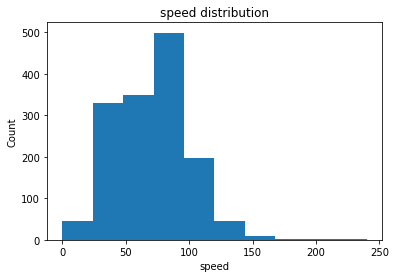

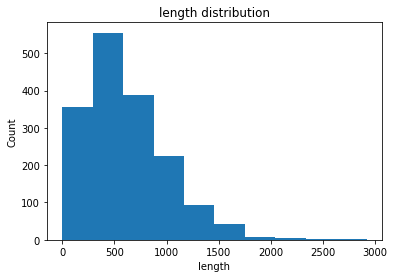

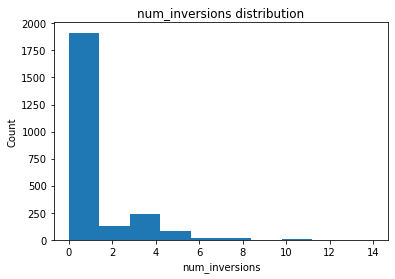

<Figure size 432x288 with 0 Axes>

In [167]:
# function to plot histogram of column values
def roller_coasters_hist(df, col_name):
  plt.hist(df[col_name].dropna())
  plt.title(col_name+' distribution')
  plt.xlabel(col_name)
  plt.ylabel('Count')
  plt.show()
  
roller_coasters_hist(roller_coasters, 'speed')
plt.clf()
roller_coasters_hist(roller_coasters, 'length')
plt.clf()
roller_coasters_hist(roller_coasters, 'num_inversions')
plt.clf()


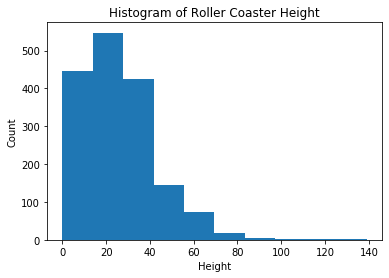

<Figure size 432x288 with 0 Axes>

In [168]:
# function to plot histogram of height values
def plot_height_histogram(df):
  heights = df[df['height'] <= 140]['height'].dropna()
  plt.hist(heights)
  plt.title('Histogram of Roller Coaster Height')
  plt.xlabel('Height')
  plt.ylabel('Count')
  plt.show()

plot_height_histogram(roller_coasters)
plt.clf()

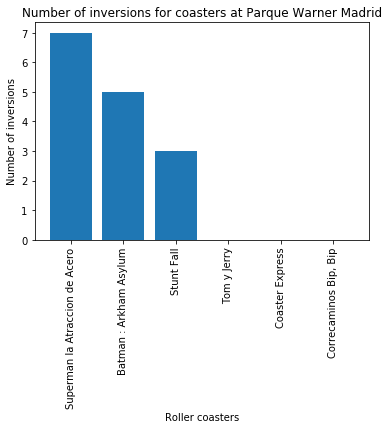

<Figure size 432x288 with 0 Axes>

In [34]:
# function to plot inversions by coaster at park
def inversions_bar_chart(df, park_name):
  amusement_park_data = df[df['park'] == park_name]
  amusement_park_data = amusement_park_data.sort_values('num_inversions', ascending=False)
  names = amusement_park_data['name']
  values = amusement_park_data['num_inversions']
  fig, ax = plt.subplots()
  plt.bar(range(len(values)), values)
  plt.title('Number of inversions for coasters at {}'.format(park_name))
  plt.xlabel('Roller coasters')
  plt.ylabel('Number of inversions')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(names, rotation = 90)
  plt.show()
  # plt.savefig('inversions_bar_chart.png')

inversions_bar_chart(roller_coasters, 'Parque Warner Madrid')
plt.clf()

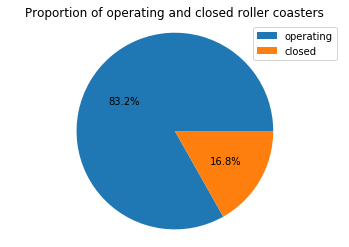

<Figure size 432x288 with 0 Axes>

In [169]:
# function to plot pie chart of operating status
def status_pie_chart(df):
  operating = df[df['status'] == 'status.operating']
  closed = df[df['status'] == 'status.closed.definitely']
  n1 = len(operating)
  n2 = len(closed)
  values = [n1, n2]
  statuses = ['operating', 'closed']
  plt.pie(values, autopct = '%0.1f%%')
  plt.axis('equal')
  plt.title('Proportion of operating and closed roller coasters')
  plt.legend(statuses)
  plt.show()
  
status_pie_chart(roller_coasters)

plt.clf()

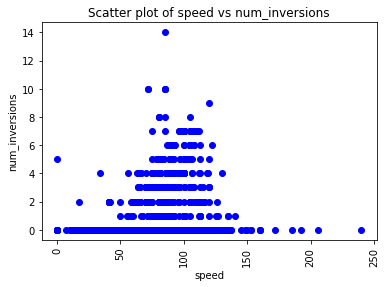

<Figure size 432x288 with 0 Axes>

In [38]:
# function to plot scatter of any two columns
def scatter_plot(df, col_name_one, col_name_two):
  colors = random.choice(['green', 'orange', 'red', 'gray', 'blue'])
  plt.scatter(df[col_name_one],df[col_name_two], c=colors)
  plt.title('Scatter plot of {} vs {}'.format(col_name_one, col_name_two))
  plt.xticks(rotation=90)
  plt.xlabel(col_name_one)
  plt.ylabel(col_name_two)
  plt.show()

scatter_plot(roller_coasters, 'speed', 'num_inversions')
plt.clf()

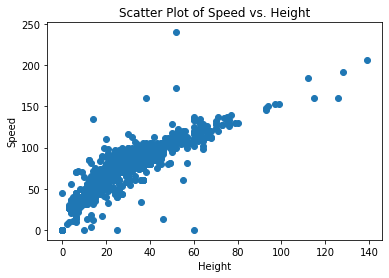

<Figure size 432x288 with 0 Axes>

In [170]:
# function to plot scatter of speed vs height
def plot_scatter_height_speed(df):
  df = df[df['height'] < 140]
  plt.scatter(df['height'],df['speed'])
  plt.title('Scatter Plot of Speed vs. Height')
  plt.xlabel('Height')
  plt.ylabel('Speed')
  plt.show()

plot_scatter_height_speed(roller_coasters)
plt.clf()

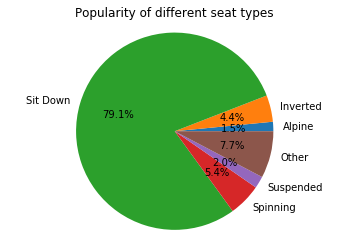

<Figure size 432x288 with 0 Axes>

In [40]:
#grouping roller coaster seatings in a new df
seat_types = roller_coasters.groupby(['seating_type']).name.count().reset_index()
seat_types.rename(columns={
  'name': 'number'},
  inplace = True
)
#creating a new df which unites all small groups from seat_types
others = pd.DataFrame({
  'seating_type': ['Other'],
  'number': [seat_types[seat_types['number'] <= 40]['number'].sum()]
})
#uniting two previous df
seat_types_concat = pd.concat([seat_types, others])
#choosing for the pie chart groups where number more than 40
pie_data = seat_types_concat[seat_types_concat['number'] > 40]
numbers = pie_data.number
names = pie_data['seating_type']
plt.pie(numbers, autopct = '%0.1f%%', labels=names)
plt.axis('equal')
plt.title('Popularity of different seat types')
plt.show()
plt.clf()

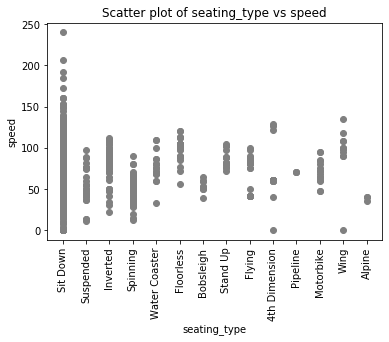

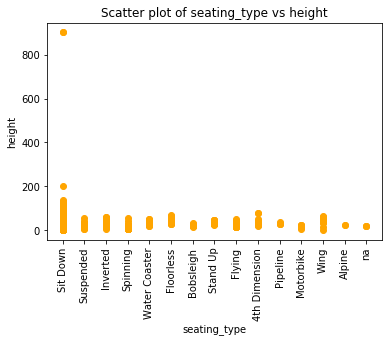

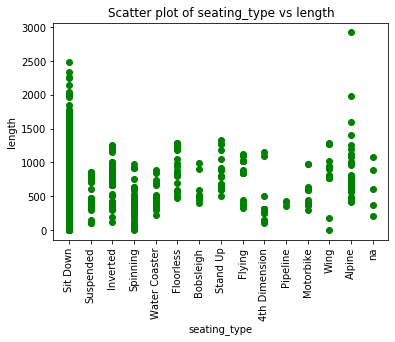

<Figure size 432x288 with 0 Axes>

In [42]:
# call the scatter_plot function to see if different seating types result in higher/faster/longer roller coasters
scatter_plot(roller_coasters, 'seating_type', 'speed')
plt.clf()
scatter_plot(roller_coasters, 'seating_type', 'height')
plt.clf()
scatter_plot(roller_coasters, 'seating_type', 'length')
plt.clf()

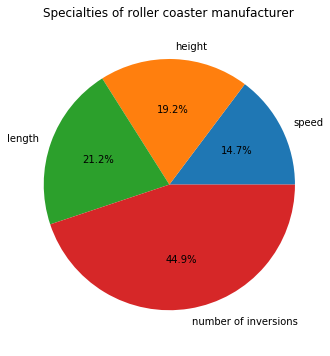

<Figure size 432x288 with 0 Axes>

In [174]:
# pie chart to see focused on different parameters
def specialties_pie(col_name):
    speed_focused = roller_coasters.groupby(col_name).speed.apply(lambda x: np.percentile(x, 55)).reset_index()
    speed_focused = speed_focused.dropna()
    height_focused = roller_coasters.groupby(col_name).height.apply(lambda x: np.percentile(x, 55)).reset_index()
    height_focused = height_focused.dropna()
    length_focused = roller_coasters.groupby(col_name).length.apply(lambda x: np.percentile(x, 55)).reset_index()
    length_focused = length_focused.dropna()
    inversion_focused = roller_coasters.groupby(col_name)['num_inversions'].apply(lambda x: np.percentile(x, 55)).reset_index()
    inversion_focused = inversion_focused.dropna()
    n1 = len(speed_focused)
    n2 = len(height_focused)
    n3 = len(length_focused)
    n4 = len(inversion_focused)
    values = [n1, n2, n3, n4]
    focuses = ['speed', 'height', 'length', 'number of inversions']
    plt.figure(figsize=(5, 6))
    plt.pie(values, autopct = '%0.1f%%', labels = focuses)
    plt.axis('equal')
    plt.title('Specialties of roller coaster {}'.format(col_name))
    plt.show()

# test the specialties_pie function on manufacturers
specialties_pie('manufacturer')  
plt.clf()

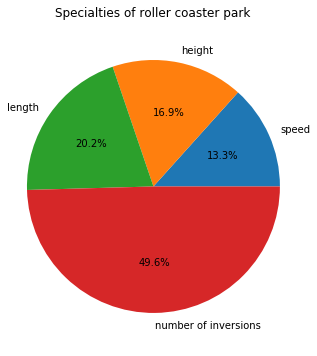

<Figure size 432x288 with 0 Axes>

In [175]:
# test the specialties_pie function on amusement parks
specialties_pie('park') 
plt.clf()

In [176]:
#counting average figures for roller coasters in a park
amusement_park_mean_values = roller_coasters.groupby('park')['speed', 'height', 'length', 'num_inversions'].mean().reset_index()
amusement_park_mean_values = amusement_park_mean_values.dropna()
print(amusement_park_mean_values.head())

                       park      speed      height      length  num_inversions
0    20th Century Fox World   0.000000    0.000000    0.000000             0.0
2            Adlabs Imagica  84.333333   25.666667  681.333333             3.5
4  Adventure City (Anaheim)  50.000000   12.000000  181.000000             0.0
5          Adventure Island  37.250000  248.250000  204.000000             0.5
6    Adventure Park Geelong  30.000000    7.000000  113.000000             0.0


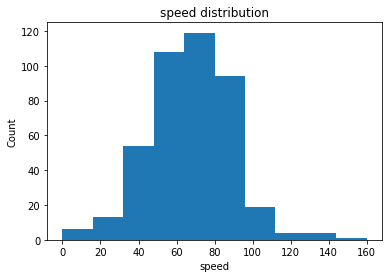

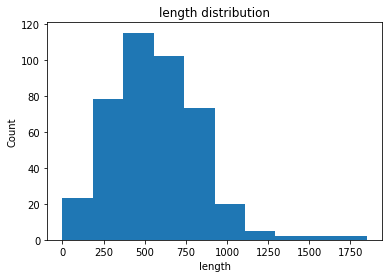

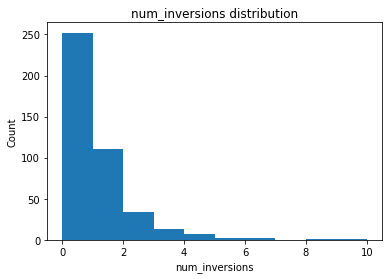

<Figure size 432x288 with 0 Axes>

In [177]:
# now calling roller_coasters_hist fuction on the new df to see which parameters the parks focus on
roller_coasters_hist(amusement_park_mean_values, 'speed')
plt.clf()
roller_coasters_hist(amusement_park_mean_values, 'length')
plt.clf()
roller_coasters_hist(amusement_park_mean_values, 'num_inversions')
plt.clf()